## Assignment 8 : Unsupervised Learning

**Name: Zunda Xu (zunda@uchicago.edu)**

### Part I : College###

In [174]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster import hierarchy

%matplotlib inline

**Question 1**: 

**Perform PCA analysis on the college dataset and plot the first two principal components. Describe the results.**

In [203]:
# read the file
college = pd.read_csv('College.csv')

In [204]:
# Transfer "Private" to dummy variable, where 0 represents "Yes", 1 represents "NO"
college.Private = pd.get_dummies(college.Private)

In [205]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,0,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,0,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,0,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


In [206]:
# Scale the data
std_college = pd.DataFrame(scale(college),  columns=college.columns)

In [207]:
std_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.612553,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.612553,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.612553,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.612553,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.612553,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [225]:
# Conducting PCA 
pca_college = PCA().fit(std_college)

In [226]:
Components = []
for i in range(len(college.columns)):
    Components.append("PC{}".format(i+1))

In [227]:
# loading pca
loading_pca_college = pd.DataFrame(pca_college.components_.T, index=college.columns, columns=Components)

In [228]:
loading_pca_college.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Private,-0.089010,0.345879,-0.151387,-0.231135,-0.044286,0.031448,-0.178345,-0.032314,-0.084985,-0.259596,0.679758,-0.245690,-0.400649,0.010057,-0.023202,0.005373,-0.044796,-0.007795
Apps,0.199630,0.343621,0.004821,0.305009,-0.022968,-0.008618,-0.061047,-0.099177,-0.084087,0.058147,0.010378,0.041806,0.037404,0.595364,0.080683,0.133747,0.458603,0.363283
Accept,0.153797,0.372557,-0.025351,0.317486,0.031438,0.013074,-0.015474,-0.054225,-0.165274,0.089482,-0.142627,0.004545,-0.073616,0.293398,0.033349,-0.146347,-0.512188,-0.547462
Enroll,0.117797,0.399697,-0.027576,0.204836,-0.065667,-0.043065,-0.008237,0.063261,-0.116813,0.074073,-0.105826,-0.034260,0.059072,-0.446273,-0.081525,0.028481,-0.403907,0.607174
Top10perc,0.360349,-0.016238,0.004681,-0.107519,-0.388227,-0.059923,-0.144406,-0.097143,0.355676,0.059358,0.022126,-0.015181,0.044352,0.000092,-0.106170,0.697422,-0.148018,-0.146308


In [229]:
num_components = len(college.columns)

Next, We construct a biplot to analyze the first two principal components:

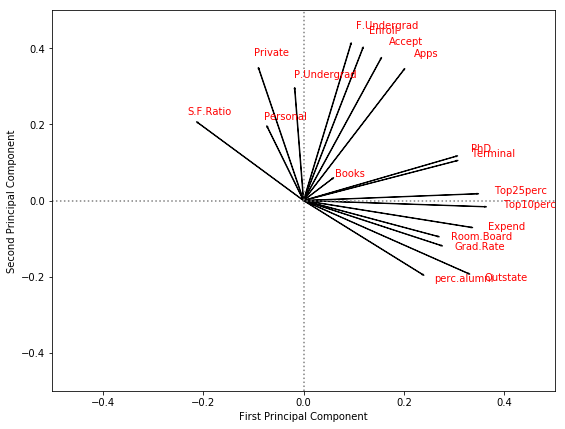

In [231]:
#plot the first two principal components
fig , pca = plt.subplots(figsize=(9,7))
pca.set_xlim(-0.5, 0.5)
pca.set_ylim(-0.5, 0.5)
pca.hlines(0,-0.5, 0.5, linestyles='dotted', colors='grey')
pca.vlines(0,-0.5, 0.5, linestyles='dotted', colors='grey')
pca.set_xlabel('First Principal Component')
pca.set_ylabel('Second Principal Component')
for var in loading_pca_college.index:
    pca.annotate(var, (loading_pca_college.PC1.loc[var]*1.1, loading_pca_college.PC2.loc[var]*1.1), color='red')
for i in range(num_components):
    pca.arrow(0,0,loading_pca_college.PC1[i], loading_pca_college.PC2[i])

In [232]:
correlates_PC1 = {}
correlates_PC2 = {}
for i in range(num_components):
    correlates_PC1[college.columns[i]] = abs(loading_pca_college.PC1[i]/loading_pca_college.PC2[i])
    correlates_PC2[college.columns[i]] = abs(loading_pca_college.PC2[i]/loading_pca_college.PC1[i])

In [233]:
sorted(correlates_PC1.items(), key=lambda x:-x[1])

[('Top10perc', 22.191986336345316),
 ('Top25perc', 19.444578814838334),
 ('Expend', 4.7376381762790638),
 ('Terminal', 2.916418535514302),
 ('Room.Board', 2.8360882695683727),
 ('PhD', 2.6099607867235814),
 ('Grad.Rate', 2.3176225971953661),
 ('Outstate', 1.710880130305382),
 ('perc.alumni', 1.2195086315367973),
 ('S.F.Ratio', 1.0286946457218196),
 ('Books', 0.9973972682194604),
 ('Apps', 0.58096070578924741),
 ('Accept', 0.41281527398368728),
 ('Personal', 0.37301147939492479),
 ('Enroll', 0.29471536730670195),
 ('Private', 0.25734416625577899),
 ('F.Undergrad', 0.22907345361878995),
 ('P.Undergrad', 0.059656014510970932)]

From the sorted results shown above, we could find that "Top10perc", "Top25perc", "Expend", "Terminal", "Room.Board" are most correlated with the first component.

In [234]:
sorted(correlates_PC2.items(), key=lambda x:-x[1])

[('P.Undergrad', 16.76276915575875),
 ('F.Undergrad', 4.3654119855552489),
 ('Private', 3.8858467807895907),
 ('Enroll', 3.3931043675755403),
 ('Personal', 2.6808826409903941),
 ('Accept', 2.4223909894368778),
 ('Apps', 1.7212868099942815),
 ('Books', 1.0026095236707295),
 ('S.F.Ratio', 0.97210576934452197),
 ('perc.alumni', 0.82000239616165937),
 ('Outstate', 0.58449448461448084),
 ('Grad.Rate', 0.43147663524256885),
 ('PhD', 0.38314751895385812),
 ('Room.Board', 0.35259833437842575),
 ('Terminal', 0.34288631340894044),
 ('Expend', 0.2110756378583134),
 ('Top25perc', 0.051428216035046798),
 ('Top10perc', 0.045061311089680714)]

From the sorted results shown above, we could find that "P.Undergrad", "F.Undergrad", "Private", "Enroll"are most correlated with the second component.

**Question 2**: 

**Calculate the cumulative proportion of variance explained by all the principal components (see 10.2.3 in ISLR).**

In [235]:
pca_college.explained_variance_ratio_

array([ 0.30332963,  0.2808937 ,  0.06608801,  0.05867382,  0.05196692,
        0.04712187,  0.03424993,  0.03264848,  0.02955748,  0.02277071,
        0.01987894,  0.01705642,  0.01030872,  0.00930944,  0.00798412,
        0.00488356,  0.00200166,  0.00127658])

***The array above shows proportion of variancre explained by each variable.***

In [236]:
np.cumsum(pca_college.explained_variance_ratio_)

array([ 0.30332963,  0.58422333,  0.65031134,  0.70898515,  0.76095207,
        0.80807394,  0.84232387,  0.87497235,  0.90452983,  0.92730054,
        0.94717949,  0.96423591,  0.97454463,  0.98385408,  0.99183819,
        0.99672176,  0.99872342,  1.        ])

***The array above shows the cumulative variance explained when you add in the previous components***

In [237]:
first_two = pca_college.explained_variance_ratio_[:2].sum()

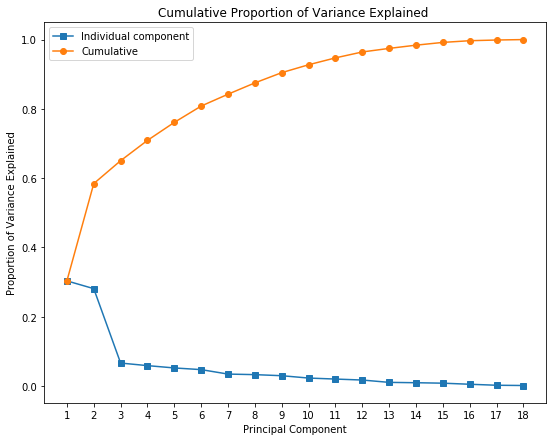

In [238]:
# Plot the cumulative proportion of Variance Explained
plt.figure(figsize=(9,7))
plt.plot(list(range(1,num_components+1)), pca_college.explained_variance_ratio_,'-s', label='Individual component')
plt.plot(list(range(1,num_components+1)), np.cumsum(pca_college.explained_variance_ratio_), '-o',label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.title('Cumulative Proportion of Variance Explained ')
plt.xticks(list(range(1,num_components+1)))
plt.legend()

***Approximately how much of the variance in College is explained by the first two principal components?***

In [239]:
first_two_explained = round(first_two, 5)

In [240]:
print("{}% of the variance in College is explained by the first two principal components".format(first_two_explained*100))

58.422% of the variance in College is explained by the first two principal components


### Part II : Clustering States###

**Question 1**:

**Perform PCA on the dataset and plot the observations on the first and second principal components.**

In [254]:
states = pd.read_csv('USArrests.csv', index_col=0)

In [255]:
states.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [256]:
std_states= pd.DataFrame(scale(states), index=states.index, columns=states.columns)

In [257]:
pca_states = PCA().fit(states)

In [258]:
Components2 = []
for i in range(len(states.columns)):
    Components2.append("C{}".format(i+1))
loading_pca_states = pd.DataFrame(pca_states.components_.T, index= states.columns, columns=Components2)

In [243]:
loading_pca_states.head()

,C1,C2,C3,C4
Murder,0.041704,0.044822,0.079891,0.994922
Assault,0.995221,0.058760,-0.067570,-0.038938
UrbanPop,0.046336,-0.976857,-0.200546,0.058169
Rape,0.075156,-0.200718,0.974081,-0.072325


In [259]:
PC = []
for i in range(len(states.columns)):
    PC.append("PC{}".format(i+1))
states_plot = pd.DataFrame(pca_states.fit_transform(states), columns=PC, index=states.index)

In [260]:
states_plot.head()

,PC1,PC2,PC3,PC4
State,,,,
Alabama,64.802164,11.448007,-2.494933,2.407901
Alaska,92.827450,17.982943,20.126575,-4.094047
Arizona,124.068216,-8.830403,-1.687448,-4.353685
Arkansas,18.340035,16.703911,0.210189,-0.520994
California,107.422953,-22.520070,6.745873,-2.811826


Text(0.5,1,'First Two Components of US Crime')

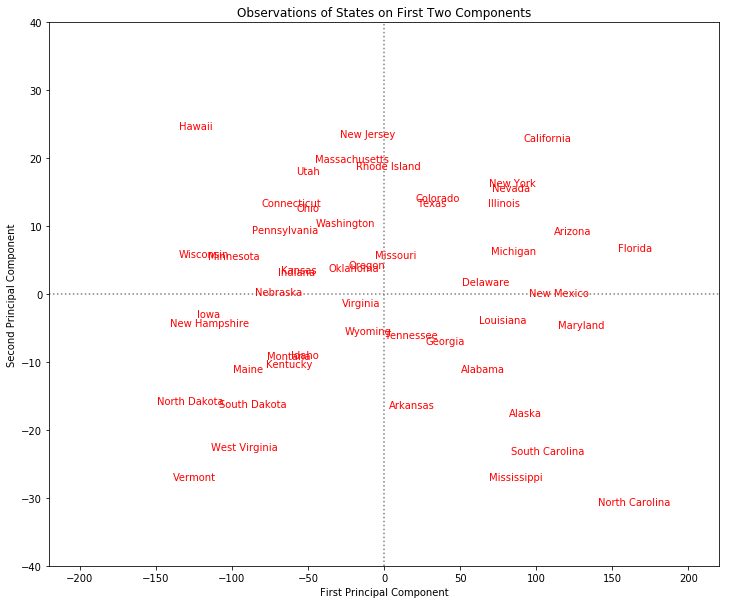

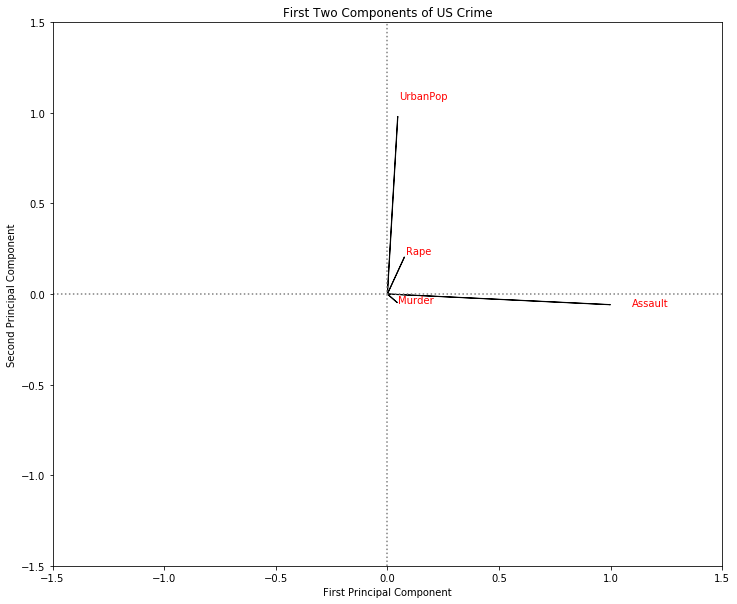

In [261]:
fig , pca2 = plt.subplots(figsize=(12,10))
pca2.set_xlim(-220, 220)
pca2.set_ylim(-40, 40)
pca2.hlines(0,-220, 220, linestyles='dotted', colors='grey')
pca2.vlines(0,-40, 40, linestyles='dotted', colors='grey')
pca2.set_xlabel('First Principal Component')
pca2.set_ylabel('Second Principal Component')
#plot states
for var in states_plot.index:
    pca2.annotate(var, (states_plot.PC1.loc[var], -states_plot.PC2.loc[var]), ha='center', color='red')
plt.title("Observations of States on First Two Components")
    
fig , pca3 = plt.subplots(figsize=(12,10))
pca3.set_xlim(-1.5, 1.5)
pca3.set_ylim(-1.5, 1.5)
pca3.hlines(0,-1.5, 1.5, linestyles='dotted', colors='grey')
pca3.vlines(0,-1.5, 1.5, linestyles='dotted', colors='grey')
pca3.set_xlabel('First Principal Component')
pca3.set_ylabel('Second Principal Component')
for var in loading_pca_states.index:
    pca3.annotate(var, (loading_pca_states.C1.loc[var]*1.1, -loading_pca_states.C2.loc[var]*1.1), color='red')
for i in range(len(states.columns)):
    pca3.arrow(0,0,loading_pca_states.C1[i], -loading_pca_states.C2[i])
plt.title("First Two Components of US Crime")

**Question 2**:

**Perform $K$-means clustering with $K=2$.**

In [262]:
k2 = KMeans(n_clusters=2, n_init=20).fit(states)

In [263]:
k2.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [264]:
k2.cluster_centers_

array([[   4.84137931,  109.75862069,   64.03448276,   16.24827586],
       [  11.85714286,  255.        ,   67.61904762,   28.11428571]])

In [265]:
k2.inertia_
pca_states.fit_transform(k2.cluster_centers_)[:,0]

array([ 72.96905251, -72.96905251])

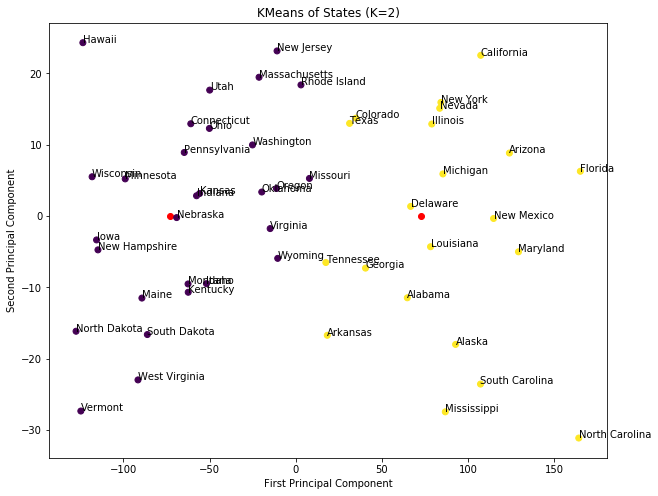

Describe the result of clusters:
If we divide the data into two clusters, then the states in the first cluster are:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

If we divide the data into two clusters, then the states in the second cluster are:
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']


In [281]:
plt.figure(figsize=(10,8))
plt.scatter(pca_states.fit_transform(k2.cluster_centers_)[:,0], pca_states.fit_transform(k2.cluster_centers_)[:,1], c='r')
plt.scatter(states_plot.PC1, -states_plot.PC2, c=k2.labels_)
for var in states_plot.index:
    plt.annotate(var, (states_plot.PC1.loc[var], -states_plot.PC2.loc[var]))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("KMeans of States (K=2)")
plt.show()

#Describe the result 
state=states.index
print(r'Describe the result of clusters:')
print(r'If we divide the data into two clusters, then the states in the first cluster are:')
print([state[i] for i in range(len(state)) if k2.labels_[i] == 0])
print()
print(r'If we divide the data into two clusters, then the states in the second cluster are:')
print([state[i] for i in range(len(state)) if k2.labels_[i] == 1])

We see that our data has been seperated into 2 groups, and we find  there is no obvious simmilarity beyond the data that emerges.

**Question 3**:

**Perform $K$-means clustering with $K=3$.**

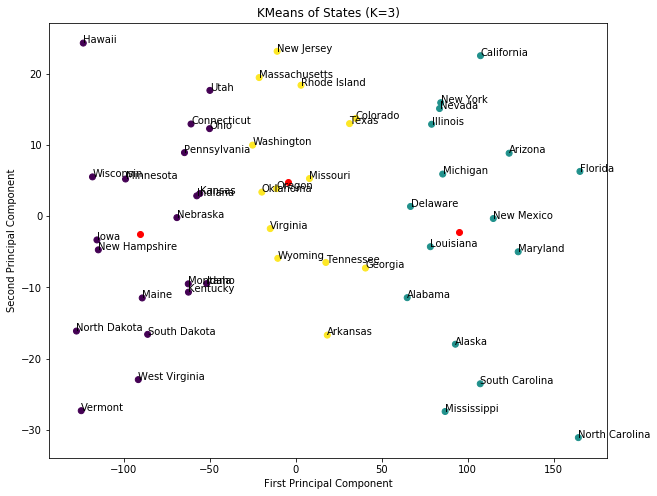

Describe the result of clusters:
If we divide the data into three clusters, then the states in the first cluster are:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']

If we divide the data into three clusters, then the states in the second cluster are:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

If we divide the data into three clusters, then the states in the third cluster are:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']


In [283]:
k3 = KMeans(n_clusters=3, n_init=20).fit(states)
plt.figure(figsize=(10,8))
plt.scatter(pca_states.fit_transform(k3.cluster_centers_)[:,0], pca_states.fit_transform(k3.cluster_centers_)[:,1], c='r')
plt.scatter(states_plot.PC1, -states_plot.PC2, c=k3.labels_)
for var in states_plot.index:
    plt.annotate(var, (states_plot.PC1.loc[var], -states_plot.PC2.loc[var]))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("KMeans of States (K=3)")
plt.show()

#Describe the result 
state=states.index
print(r'Describe the result of clusters:')
print(r'If we divide the data into three clusters, then the states in the first cluster are:')
print([state[i] for i in range(len(state)) if k3.labels_[i] == 0])
print()
print(r'If we divide the data into three clusters, then the states in the second cluster are:')
print([state[i] for i in range(len(state)) if k3.labels_[i] == 1])
print()
print(r'If we divide the data into three clusters, then the states in the third cluster are:')
print([state[i] for i in range(len(state)) if k3.labels_[i] == 2])

When k =3, we see the states are seperated into three groups, also find that it seemes that the group on the left in the k=2 graph has been split into two groups.

**Question 4**:

**Perform $K$-means clustering with $K=4$.**

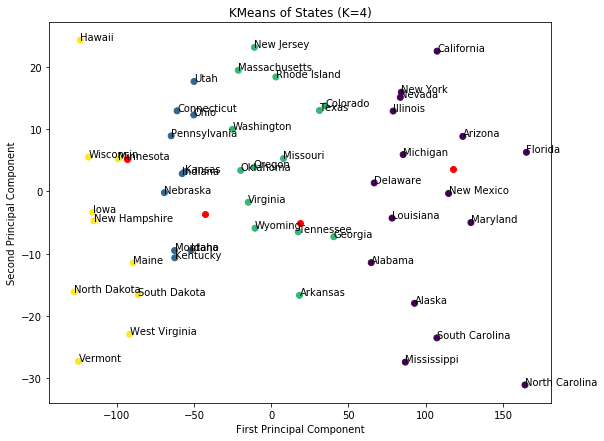

Describe the result of clusters:
If we divide the data into four clusters, then the states in the first cluster are:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

If we divide the data into four clusters, then the states in the second cluster are:
['Connecticut', 'Idaho', 'Indiana', 'Kansas', 'Kentucky', 'Montana', 'Nebraska', 'Ohio', 'Pennsylvania', 'Utah']

If we divide the data into four clusters, then the states in the third cluster are:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

If we divide the data into four clusters, then the states in the fourth cluster are:
['Hawaii', 'Iowa', 'Maine', 'Minnesota', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']


In [285]:
k4 = KMeans(n_clusters=4, n_init=20).fit(states)
plt.figure(figsize=(9,7))
plt.scatter(pca_states.fit_transform(k4.cluster_centers_)[:,0], pca_states.fit_transform(k4.cluster_centers_)[:,1], c='r')
plt.scatter(states_plot.PC1, -states_plot.PC2, c=k4.labels_)
for var in states_plot.index:
    plt.annotate(var, (states_plot.PC1.loc[var], -states_plot.PC2.loc[var]))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("KMeans of States (K=4)")
plt.show()

#Describe the result 
state=states.index
print(r'Describe the result of clusters:')
print(r'If we divide the data into four clusters, then the states in the first cluster are:')
print([state[i] for i in range(len(state)) if k4.labels_[i] == 0])
print()
print(r'If we divide the data into four clusters, then the states in the second cluster are:')
print([state[i] for i in range(len(state)) if k4.labels_[i] == 1])
print()
print(r'If we divide the data into four clusters, then the states in the third cluster are:')
print([state[i] for i in range(len(state)) if k4.labels_[i] == 2])
print()
print(r'If we divide the data into four clusters, then the states in the fourth cluster are:')
print([state[i] for i in range(len(state)) if k4.labels_[i] == 3])

Now our data have been sperated into 4 groups, and it seems both of the two groups existed in the "k=2" graph are splited into two groups , and we find There is some simmilarity among the states.

**Question 5**:

**Perform $K$-means clustering with $K=3$ on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with $K=3$ based on the raw data.**

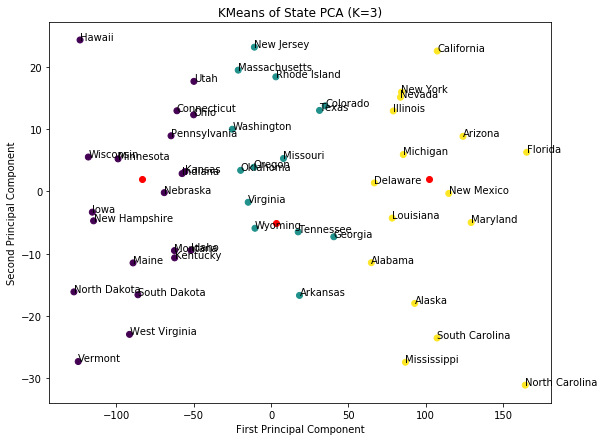

Describe the result of clusters:
If we divide the data into three clusters, then the states in the first cluster are:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']

If we divide the data into three clusters, then the states in the second cluster are:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

If we divide the data into three clusters, then the states in the third cluster are:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']


In [286]:
k3_scores = KMeans(n_clusters=3, n_init=20).fit(states_plot)
plt.figure(figsize=(9,7))
plt.scatter(k3_scores.cluster_centers_[:,0], k3_scores.cluster_centers_[:,1], c='r')
plt.scatter(states_plot.PC1, -states_plot.PC2, c=k3_scores.labels_)
for var in states_plot.index:
    plt.annotate(var, (states_plot.PC1.loc[var], -states_plot.PC2.loc[var]))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("KMeans of State PCA (K=3)")
plt.show()

#Describe the result 
state=states.index
print(r'Describe the result of clusters:')
print(r'If we divide the data into three clusters, then the states in the first cluster are:')
print([state[i] for i in range(len(state)) if k3_scores.labels_[i] == 0])
print()
print(r'If we divide the data into three clusters, then the states in the second cluster are:')
print([state[i] for i in range(len(state)) if k3_scores.labels_[i] == 1])
print()
print(r'If we divide the data into three clusters, then the states in the third cluster are:')
print([state[i] for i in range(len(state)) if k3_scores.labels_[i] == 2])

Compared to the inital k=3 clustering graph, the groups seem to be centered at different locations though the results are similar, which means the state data and groups appear to be mostly the same.

**Question 6**:

**Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.**

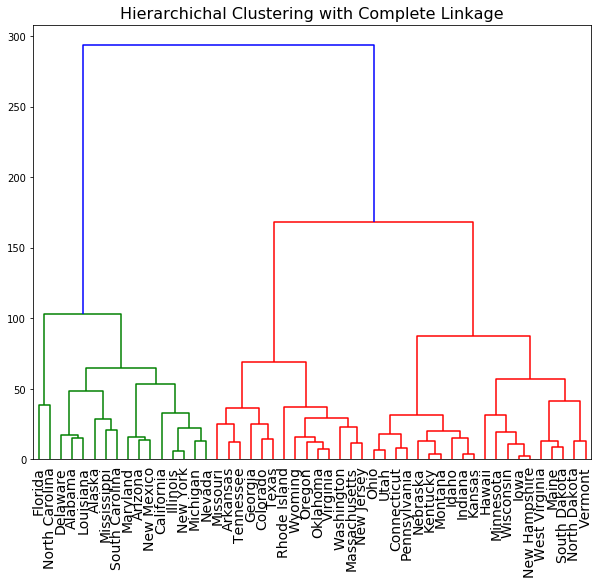

In [270]:
hier_clustering = hierarchy.complete(states)
plt.figure(figsize = (10,8))
hr.dendrogram(hier_clustering, labels = states.index, leaf_font_size=14)
plt.title("Hierarchichal Clustering with Complete Linkage",fontsize = 16)
plt.show()

**Question 7**:

**Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?**

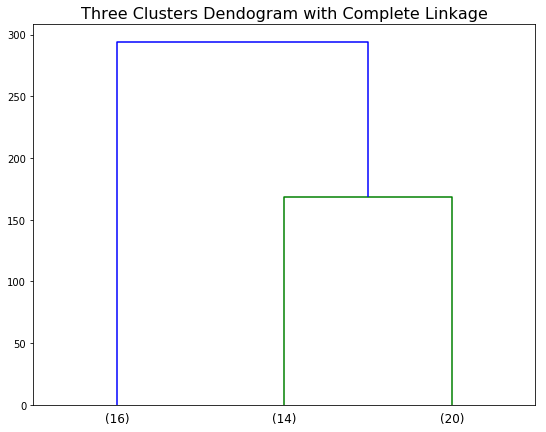

In [271]:
hier_clustering = hierarchy.complete(states)
plt.figure(figsize = (9,7))
hierarchy.dendrogram(hier_clustering, truncate_mode='lastp', p=3, labels = states.index)
plt.title("Three Clusters Dendogram with Complete Linkage",fontsize = 16)
plt.show()

In [272]:
print("The outcomes of clustering:")
print()
cut_h = hierarchy.fcluster(hier_clustering,3,criterion='maxclust')
category = pd.Series(cut_h, dtype="category")
membership = pd.Series(states.index).groupby(category)
d = {}
for group, state in membership:
    d[group] = list(state)
    print ('The states in group {} are {}.'.format(group, ", ".join(list(state))))
    print()

The outcomes of clustering:

The states in group 1 are Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina.

The states in group 2 are Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming.

The states in group 3 are Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin.



**Question 8**: 

**Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation $1$. What effect does scaling the variables have on the hierarchical clustering obtained?**

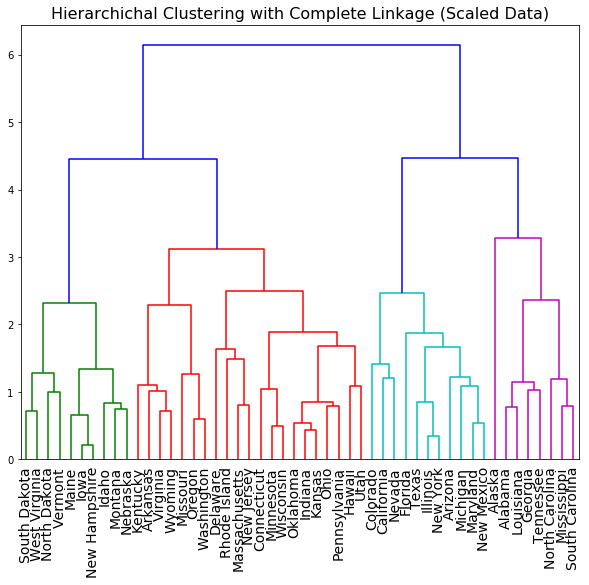

In [273]:
hier_clustering_std = hierarchy.complete(std_states)
plt.figure(figsize = (10,8))
hr.dendrogram(hier_clustering_std, labels = states.index, leaf_font_size=14)
plt.title("Hierarchichal Clustering with Complete Linkage (Scaled Data)",fontsize = 16)
plt.show()

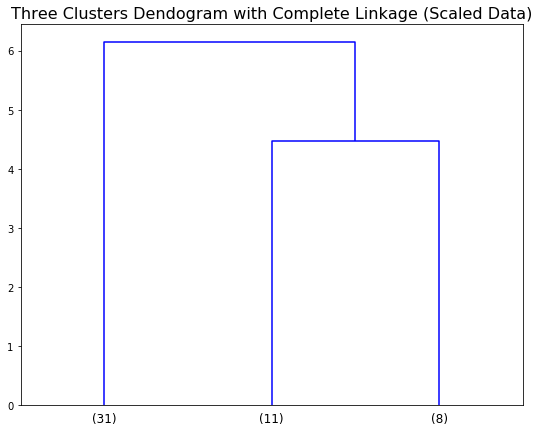

In [274]:
hier_clustering_std = hierarchy.complete(std_states)
plt.figure(figsize = (9,7))
hierarchy.dendrogram(hier_clustering_std, truncate_mode='lastp', p=3, labels = states.index)
plt.title("Three Clusters Dendogram with Complete Linkage (Scaled Data)",fontsize = 16)
plt.show()

In [275]:
print("The outcomes of clustering using scaled data:")
print()
cut_h_std = hierarchy.fcluster(hier_clustering_std,3,criterion='maxclust')
category_std = pd.Series(cut_h_std, dtype="category")
membership_std = pd.Series(states.index).groupby(category_std)
d2 = {}
for group, state in membership_std:
    d2[group] = list(state)
    print ('The states in group {} are {}.'.format(group, ", ".join(list(state))))
    print()

The outcomes of clustering using scaled data:

The states in group 1 are Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming.

The states in group 2 are Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas.

The states in group 3 are Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee.



In [276]:
print("Comparison of the outcomes of clustering:")
print()
for group in d:
    member = d[group]
    member_std = d2[group]
    member_all = set(member + member_std)
#     print (c)
    diff_member = member_all - set(member)
    diff_member_std = member_all - set(member_std)
    print ('For group {}:'.format(group))
    print()
    print('States {} now belong to a different cluster.'.format(", ".join(list(diff_member))))
    print()
    print('States {} are the new additions to group {}.'.format(", ".join(list(diff_member_std)), group))
    print ()

Comparison of the outcomes of clustering:

For group 1:

States Ohio, Wisconsin, Connecticut, Nebraska, North Dakota, Oklahoma, Idaho, New Hampshire, Minnesota, Arkansas, Kentucky, Maine, Indiana, New Jersey, Rhode Island, Iowa, Washington, Oregon, Vermont, Utah, Kansas, Wyoming, Pennsylvania, Missouri, South Dakota, Virginia, Montana, Hawaii, Massachusetts, West Virginia now belong to a different cluster.

States Arizona, New York, Alaska, New Mexico, Florida, Michigan, Nevada, Illinois, North Carolina, Maryland, California, South Carolina, Louisiana, Alabama, Mississippi are the new additions to group 1.

For group 2:

States Arizona, New York, New Mexico, Florida, Michigan, Nevada, Illinois, Maryland, California now belong to a different cluster.

States New Jersey, Rhode Island, Georgia, Washington, Wyoming, Tennessee, Missouri, Arkansas, Oregon, Oklahoma, Virginia, Massachusetts are the new additions to group 2.

For group 3:

States Georgia, Alaska, Tennessee, North Carolina, Sou

**Conclusion:** 

As the difference shown in two dendograms and the comparison of the clustering outcomes shown above, although two outcomes are different, the structures still look similar. About the difference in graphs, there seems to be less distance between different states in the dendogram using scaled data. The possible reason is that we are clustering on variables with different scales. Thus, it will be more convenient for us to analyze the data if we could scale them and making each variable carry equal weight.